In [47]:
#how to build a simple linear regression model with python

In [199]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [200]:
#load dataset
data=pd.read_csv('C:/Users/safae/Documents/weight-height.csv')

In [201]:
#Quick view about  the dataset
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [202]:
data.shape

(10000, 3)

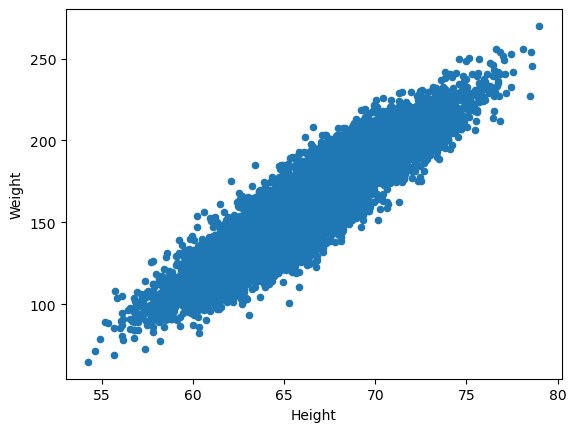

In [203]:
data.plot(kind='scatter',x='Height',y='Weight')
plt.show()

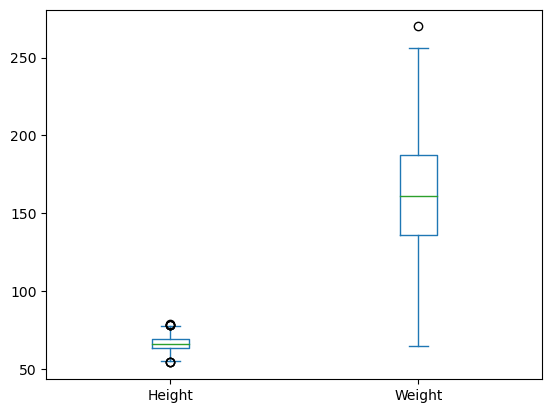

In [204]:
#A box plot is a type of plot that displays the distribution of a dataset along with its outliers,
#using five summary statistics: minimum, first quartile, median, third quartile, and maximum.
data.plot(kind='box')
plt.show()

In [205]:
#correlation coefficients
#The correlation coefficient is a measure of the strength and direction of the linear relationship between two variables. A value of 1 indicates a perfect positive linear relationship, a value of -1 indicates a perfect negative linear relationship, and a value of 0 indicates no linear relationship. The closer the correlation coefficient is to 1 or -1, the stronger the linear relationship between the variables.
# The correlation coefficient between 'Height' and 'Weight' is 0.924756, which indicates a strong positive correlation between these variables.
data.corr() 

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [206]:
print(data['Gender'].isnull().sum())

0


In [207]:
#Convert 'Gender' column to numerical data
data['Gender'].unique()
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Separate input features and target variable
X = data[['Gender', 'Height']]
y = data['Weight']

In [208]:
data['Gender']

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Gender, Length: 10000, dtype: int64

In [209]:
#Build linear regression model 
lm= linear_model.LinearRegression()
model=lm.fit(X,y)

In [210]:
#coef_ is an attribute of the model that returns the coefficients( θ1, θ2,....) of the linear regression equation.
#the resulting array array([19.37771052,  5.97694123]) is the coefficients of the 'Height' predictor variable in the linear regression equation. This coefficients represent the change in the target variable (i.e., 'Weight') for every unit increase in the predictor variable (i.e., 'Height').sam thing with gender(categorical variable)
#In other words, the coefficient tells us that for every one unit increase in 'Height', the predicted value of 'Weight' increases by 0.11081279 units, holding all other variables constant. This value is sometimes referred to as the slope or gradient of the regression line, and it can be used to make predictions about new data points based on their 'Height' value.
model.coef_

array([19.37771052,  5.97694123])

In [190]:
#indicates that the intercept or constant (bias) term in the linear regression equation is approximately -244.92350252069983.
#his means that when the 'Height' variable is zero, the predicted value of 'Weight' is approximately -244.92350252069983. However, it is important to note that this value is not meaningful in the context of the dataset, as 'Height' cannot actually be equal to zero in this case. Instead, the intercept term is used to adjust the linear regression line up or down on the y-axis, so that it fits the data as closely as possible.
model.intercept_

-244.92350252069983

In [191]:
#we use a score called R-squared, which tells us how much of the change in weight is related to the change in height.
#Our R-squared score is 0.9056, which means that height can explain about 90.56% of the changes in weight that we see in our data.
#This is a pretty good score, so it looks like using height to predict weight works well in this case!
#etty good score, so it looks like using height to predict weight works well in this case!
model.score(X[['Gender', 'Height']], y)#Evaluate the model

0.9027481729220092

In [192]:
# predict the weight of a person with gender = 1 and height = 190
height_new= 73.467
gender=1
new_data = pd.DataFrame({'Gender': [gender], 'Height': [height_new]})
weight_predict = model.predict(new_data)
print(weight_predict)

[213.56214919]


In [193]:
#Predict more values
height_new=[60.7,88.79,56.568]
gender=0
X = pd.DataFrame({'Gender': [gender]*len(height_new), 'Height': height_new})
Y= model.predict(X)
Y=pd.DataFrame(Y)
#concatenating two dataframes X and Y along axis=1 to create a new dataframe df. Then, you are removing any duplicate columns in the df dataframe using the ~df.columns.duplicated() expression. The resulting dataframe is then assigned to df. Finally, you are renaming the columns of df to 'Gender', 'Height', and 'Weight' using the .columns attribute.
df=pd.concat([X,Y],axis=1)
df = df.loc[:,~df.columns.duplicated()] # drop duplicate columns
df.columns = ['Gender', 'Height', 'Weight'] # rename columns
df

,Gender,Height,Weight
0,0,60.700,117.876830
1,0,88.790,285.769109
2,0,56.568,93.180109


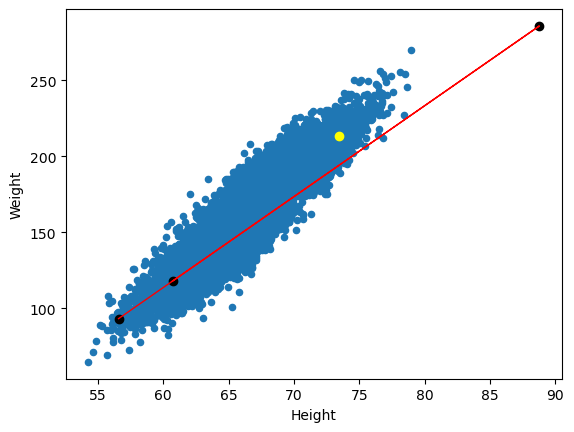

In [194]:
#Visualize the result
data.plot(kind='scatter',x='Height',y='Weight')
#plotting the regression line
#plotting predicting value
plt.scatter(new_data['Height'],weight_predict,color='yellow')
#plt.plot(new_data['Height'],weight_predict,color='black',linewidth=2)
#plotting predicting values 
plt.plot(X['Height'],model.predict(X),color='red',linewidth=1)
plt.scatter(X['Height'],Y,color='black')
plt.show()

In [211]:
#Note:  a dataset is a collection of data points, while a dataframe is a two-dimensional data structure that stores data in a tabular form, usually in rows and columns.